In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import json
import numpy as np

In [20]:
FOLDER_PATH = 'data/'
DATA_COLUMNS = ['wiki_movie_id', 'freebase_movie_id', 'movie_name',
       'movie_box_office_revenue', 'movie_runtime', 'languages', 'countries',
       'genres', 'imdb_id', 'cast', 'rating', 'votes', 'budget', 'plot',
       'characters_names', 'main_character', 'release_year']
df = pd.read_csv(FOLDER_PATH + 'movie_processed.csv', names=DATA_COLUMNS, header=0, index_col=0)

In [21]:
df.head()

,wiki_movie_id,freebase_movie_id,movie_name,movie_box_office_revenue,movie_runtime,languages,countries,genres,imdb_id,cast,rating,votes,budget,plot,characters_names,main_character,release_year
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",228333.0,"['Natasha Henstridge', 'Ice Cube', 'Jason Stat...",4.9,55370.0,28000000.0,"Set in the second half of the 22nd century, th...","['Akooshay', 'Lieutenant Melanie Ballard', 'De...",Lieutenant Melanie Ballard,2001.0
1,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,['English'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological...",NaN,NaN,NaN,NaN,NaN,A series of murders of rich young women throug...,[],NaN,1987.0
2,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,['German'],['Germany'],['Drama'],83949.0,"['Gudrun Landgrebe', 'Mathieu Carrière', 'Hann...",6.0,591.0,NaN,"Eva, an upper class housewife, becomes frustra...",[],NaN,1983.0
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,86.0,['English'],['South Africa'],"['Family Film', 'Fantasy', 'Adventure', 'World...",NaN,NaN,NaN,NaN,NaN,"Every hundred years, the evil Morgana returns...",['Morgana'],Morgana,2002.0
4,6631279,/m/0gffwj,Little city,NaN,93.0,['English'],['United States of America'],"['Romantic comedy', 'Ensemble Film', 'Comedy-d...",NaN,NaN,NaN,NaN,NaN,"Adam, a San Francisco-based artist who works a...","['Rebecca', 'Nina']",Nina,1997.0


### Analysis for research question n*1

In [22]:
# Helper function to format the axes tick labels
def currency(x, pos):
    if x >= 1e6:
        s = '${:1.0f}M'.format(x*1e-6)
    elif x > 0:
        s = '${:1.0f}K'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x)
    return s

Graph 1 

In [23]:
# We remove the movies with no release date since it will be impossible to include them in the time evolution (2619 movies removed)
df_r1 = df[df["release_year"].notna()]
# We remove the movies with no box office value (removed 27030 movies) 34617-7587=27030
df_box_office = df[df["movie_box_office_revenue"].notna()]

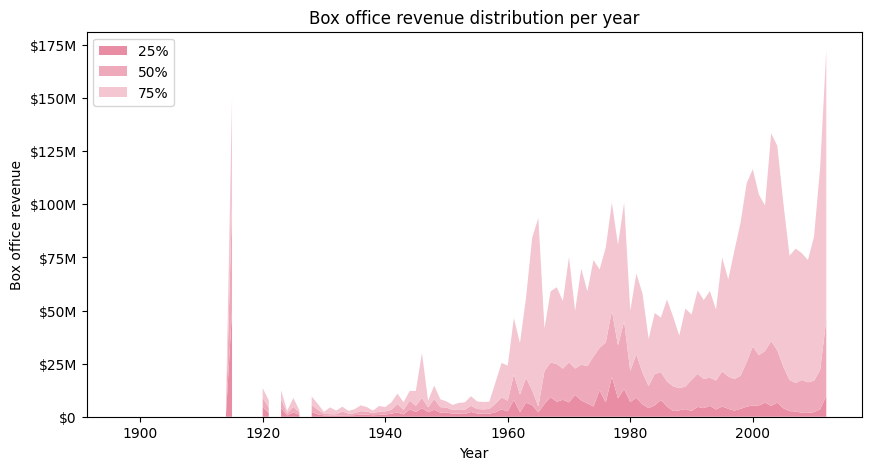

In [24]:
stats = df_r1[["release_year", "movie_box_office_revenue"]].groupby("release_year").describe()
stat_25 = stats.movie_box_office_revenue["25%"]
stat_50 = stats.movie_box_office_revenue["50%"]
stat_75 = stats.movie_box_office_revenue["75%"]

fig, ax = plt.subplots(figsize=(10, 5))
ax.stackplot(stats.index, stat_25, stat_50, stat_75, labels=["25%", "50%", "75%"], colors=["#E88DA4", "#EEAABB", "#F3C6D1"])
ax.set_title("Box office revenue distribution per year")
ax.set_xlabel("Year")
ax.set_ylabel("Box office revenue")
ax.legend(loc='upper left')
ax.yaxis.set_major_formatter(currency)
plt.show()


In [36]:
df_r1[df_r1.release_year <= 1920].sort_values(by="movie_box_office_revenue", ascending=False)[["movie_name", "movie_box_office_revenue", "release_year"]].head(6)


,movie_name,movie_box_office_revenue,release_year
1394,The Birth of a Nation,50000000.0,1915.0
12958,Way Down East,4500000.0,1920.0
25817,The Million Dollar Mystery,1500000.0,1914.0
25076,The Corbett-Fitzsimmons Fight,100000.0,1897.0
537,Rose of the Rancho,87028.0,1914.0
100,Thunderbolt,NaN,1910.0


Before 1920 we only have the box office value for 4 movies of which "The Birth of a Nation" and " Way Down East" which respectively had a box office of 50 million dollars and 4,5 million dollars. This explains the spike seen on the graph. Furtheron we will remove those movies even if the data is correct it is not relevant as we do not have enough data point for that period. 

Graph 2

/tmp/ipykernel_75705/684159114.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.bar(df_character_type.mean().sort_values("movie_box_office_revenue", ascending=False).index[0:30], df_character_type.mean().sort_values("movie_box_office_revenue", ascending=False)[0:30]["movie_box_office_revenue"], label="Mean box office revenue")
/tmp/ipykernel_75705/684159114.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


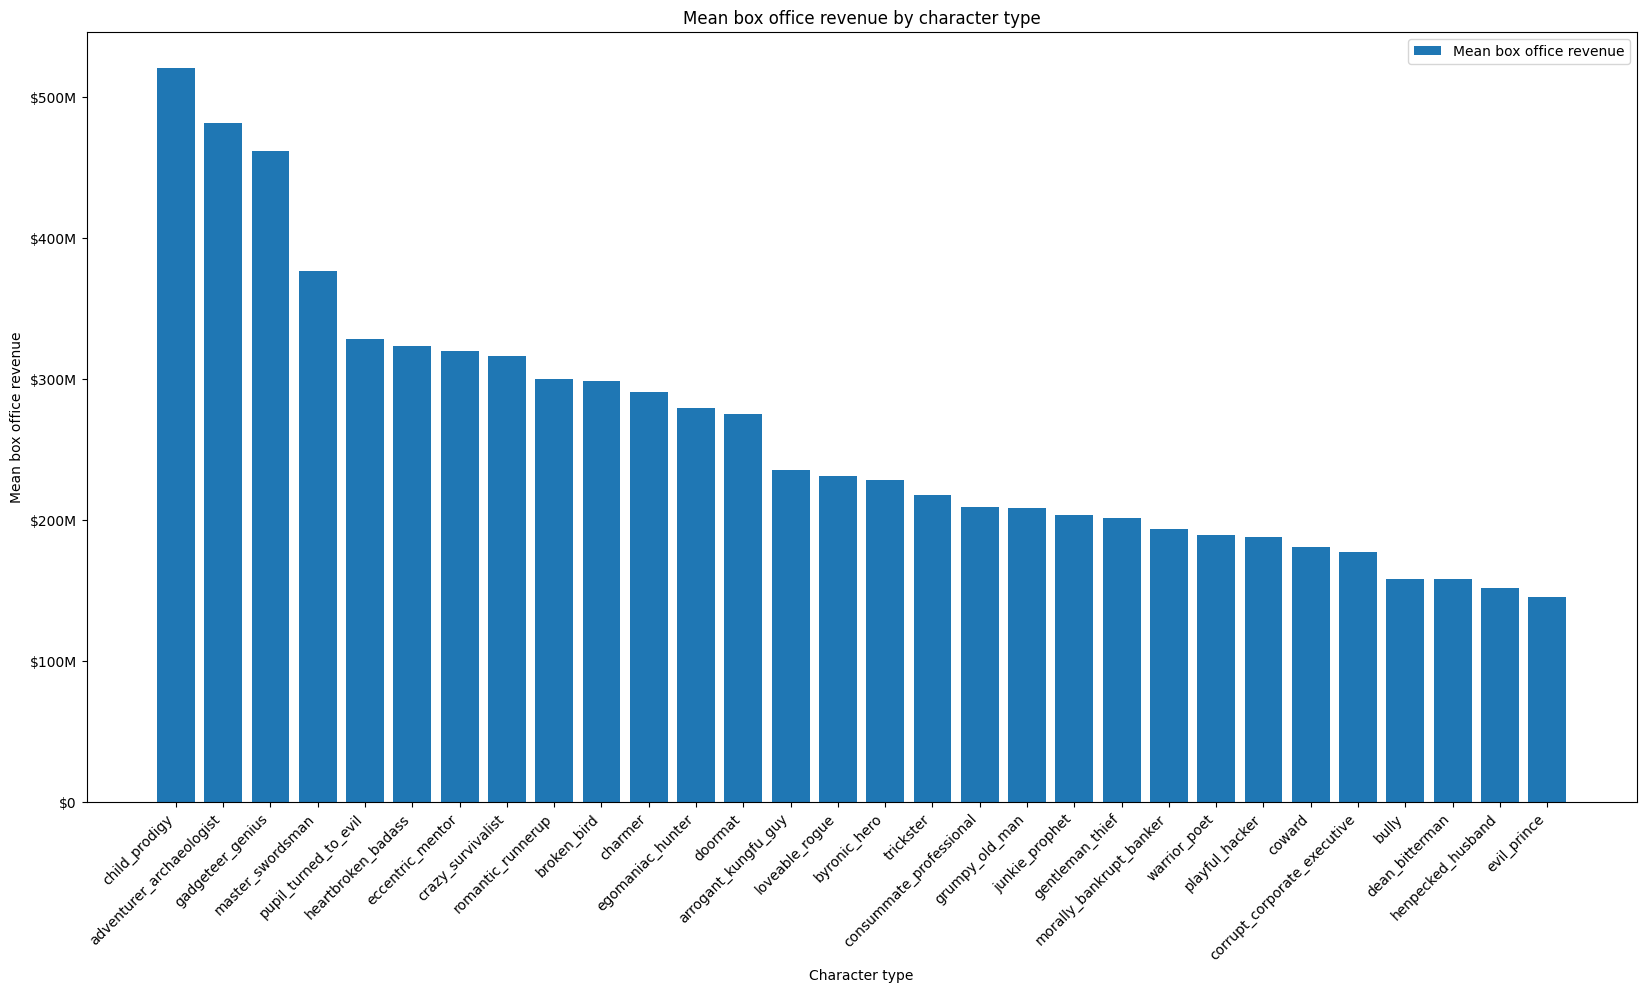

In [35]:

COLUMNS_NAMES_TV_TROPES = [
    "character_type",
    "character_name",
    "movie_name",
    "freebase_id",
    "actor_name",
]
df_character_type = pd.read_csv(FOLDER_PATH + 'tvtropes_processed.csv', header=None, names=COLUMNS_NAMES_TV_TROPES)

# We add the box office revenue for each movie in the character type dataframe
df_character_type["movie_box_office_revenue"] = df_character_type["movie_name"].apply(lambda movie_name: df_box_office[df_box_office["movie_name"] == movie_name]["movie_box_office_revenue"].values)
df_character_type["movie_box_office_revenue"] = df_character_type["movie_box_office_revenue"].apply(lambda x: x[0] if len(x) > 0 else 0)
#TODO: drop movies with 0 as box office_revenue (filter ?)

# We group the dataframe by character type and take the mean of the box office revenue
df_character_type = df_character_type.groupby("character_type")

# We plot the mean box office revenue by character type for the 30 character types with the highest mean box office revenue
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_character_type.mean().sort_values("movie_box_office_revenue", ascending=False).index[0:30], df_character_type.mean().sort_values("movie_box_office_revenue", ascending=False)[0:30]["movie_box_office_revenue"], label="Mean box office revenue")
ax.set_xlabel("Character type")
ax.set_ylabel("Mean box office revenue")
ax.set_title("Mean box office revenue by character type")
ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(currency)
plt.show()

Graph 3 => to be cleaned

In [7]:
df_1 = df_r1[["movie_box_office_revenue", "genres"]]
df_1["genres"] = df_1["genres"].apply(lambda x: literal_eval(x))
b = df_1.explode("genres").groupby("genres").sum().sort_values("movie_box_office_revenue", ascending=False)

/var/folders/07/9l9kqd013xjdlz8_0b2__8xr0000gq/T/ipykernel_39903/3228862359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["genres"] = df_1["genres"].apply(lambda x: literal_eval(x))


<AxesSubplot: xlabel='genres'>

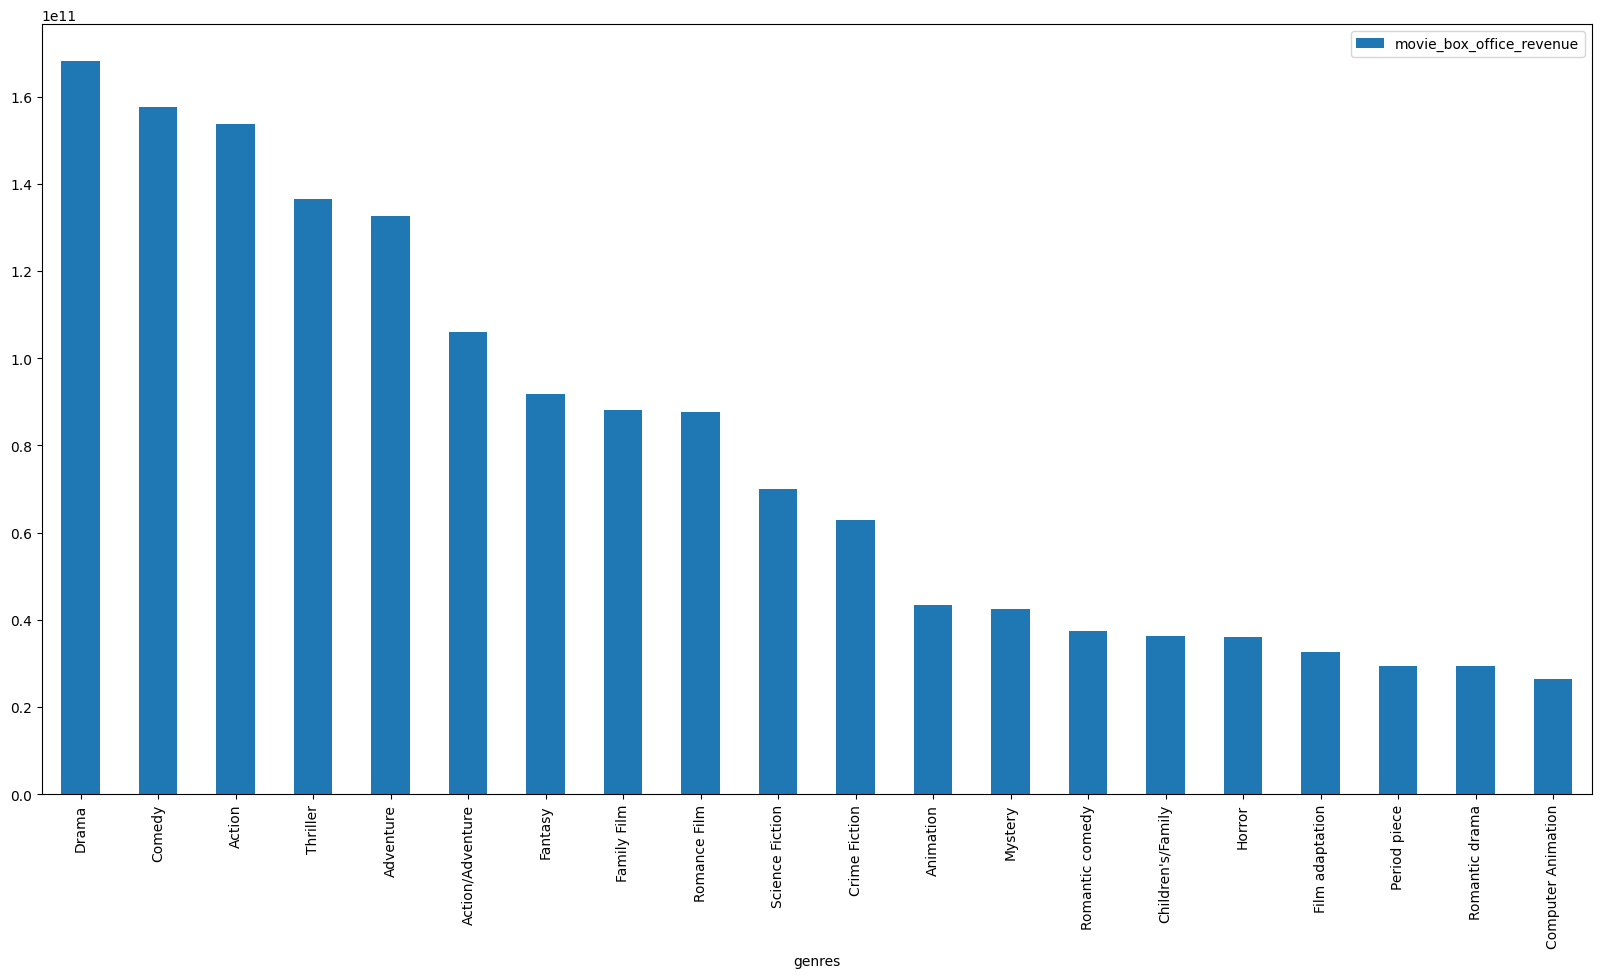

In [8]:
b.head(20).plot(kind="bar", figsize=(20, 10))
# to display cute dollar signs
#ax.yaxis.set_major_formatter(currency)


The main genders are Drama, Comedy, Action, Thriller and Adventure.
We will go deeper in the analysis with those 5 genres.

In [9]:
df_test = df_r1[["movie_box_office_revenue", "genres", "release_year"]].copy()
df_test["genres"] = df_test["genres"].apply(literal_eval)
a = df_test.explode("genres").reset_index(drop=True).groupby(["genres","release_year"]).agg({"movie_box_office_revenue": "mean"}).apply(lambda x: x)

In [11]:
plot1 = a[a.index.get_level_values("genres") == "Action"]
plot2 = a[a.index.get_level_values("genres") == "Drama"]
plot3 = a[a.index.get_level_values("genres") == "Comedy"]

fig1, ax1 = plt.subplots()


plt.plot(plot1.index.get_level_values("release_year"), plot1["movie_box_office_revenue"], label="Action")
plt.plot(plot2.index.get_level_values("release_year"), plot2["movie_box_office_revenue"], label="Drama")
plt.plot(plot3.index.get_level_values("release_year"), plot3["movie_box_office_revenue"], label="Comedy")
plt.legend()
plt.show()

Restes du festin

In [ ]:
df_r1_clean = df_r1[df_r1["movie_runtime"] < 450].sort_values("movie_runtime", ascending=False)
movie_mean_by_year = df_r1_clean.groupby("release_year")["movie_runtime"].mean()
hist, edges = np.histogram(df_r1_clean["movie_runtime"], bins=100)
colors = np.array(["C0", "C1"])[(edges[:-1] > 0).astype(int)]
plt.bar(edges[:-1], hist, width=np.diff(edges), align="edge", color=colors)
plt.show()

In [ ]:
df_r1_clean_1 = df_r1_clean[df_r1_clean.release_year < 1950]
df_r1_clean_2 = df_r1_clean[(df_r1_clean.release_year >= 1950)]

plt.hist(df_r1_clean_1["movie_runtime"], bins=100, color="red", alpha=0.3, label="Before 1950")
plt.hist(df_r1_clean_2["movie_runtime"], bins=100, color="blue", alpha=0.3, label="After 1950")
plt.show()